# Helper Notebook
Creating this notebook so as to implement any sort of functionality in this notebook first and then on the main `app.py` file.

In [1]:
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sudalairajkumar/indian-startup-funding")

print("Path to dataset files:", path)

Path to dataset files: /home/harshchandra/.cache/kagglehub/datasets/sudalairajkumar/indian-startup-funding/versions/4


In [3]:
df = pd.read_csv("startup_funding.csv")
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [4]:
# sorting the`Startup Name` column **Lexicographically**
sorted(df['Startup Name'].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

In [5]:
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')

In [6]:
# sorting the `Investors Name` column **Lexicographically**
sorted(df['Investors Name'].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

### Notable points about **Basic Level Data Cleaning**
Here are the problems for our functionality of **Investors Analysis**:

#### Problem 1:
In some of the **instances**, there are names of Multiple Investors. Multiple names of Investors, cause difficulty in analysis of one investor.

#### Problem 2:
At multiple places, there the name of the same startup is mention with some variations. Eg: 'Ola' also exists by the name 'Olacabs', 'Ola Cabs', 'Ola Electric', etc.

### Changes to be made in the Data:
1. Drop Remarks column.
2. Set Index as `Sr No`
3. Rename the column names wherever necessary.
4. Convert amount in **USD** to **Cr. Rs**.
5. Distinguish the names of Investors.
6. Date col
7. Dropna

In [7]:
# dropping `Remarks` column
df.drop(columns='Remarks', inplace=True)

In [8]:
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


In [9]:
# setting `Sr No` as index
df.set_index('Sr No', inplace=True)
df.head(2)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


In [10]:
# renaming columns
df.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup',
    'Industry Vertical': 'vertical',
    'SubVertical': 'subvertical',
    'City  Location': 'city',
    'Investors Name': 'investors',
    'InvestmentnType': 'round',
    'Amount in USD': 'amount'
}, inplace=True)
df.columns

Index(['date', 'startup', 'vertical', 'subvertical', 'city', 'investors',
       'round', 'amount'],
      dtype='object')

In [11]:
# converting amount to Cr INR

# replacing the nan values with 0 to mark them as "Undisclosed"
df['amount'] = df['amount'].fillna('0')

In [12]:
# removing the ',', i.e. comma, and 'undisclosed' from the amounts to convert them to Cr INR
df['amount'] = df['amount'].str.replace(',', '')
df['amount'] = df['amount'].str.replace('undisclosed', '0')

In [13]:
df['amount'] = df['amount'].str.replace('Undisclosed', '0')
df['amount'] = df['amount'].str.replace('unknown', '0')

In [14]:
df = df[df['amount'].str.isdigit()]

In [15]:
df['amount'] = df['amount'].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3029 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [17]:
def to_inr(dollar):
    inr = dollar * 88.69
    return inr / 10000000

In [18]:
df['amount'] = df['amount'].apply(to_inr)

In [19]:
df['amount'].sample(5)

Sr No
1331      6.20830
2812      1.77380
1539      3.99105
215     399.10500
2360      3.54760
Name: amount, dtype: float64

In [20]:
# converting the string date to python date dtype
df['date'] = df['date'].str.replace('05/072018', '05/07/2018')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1284 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [22]:
# dropping the instances which are having nan values in multiple cols
df = df.dropna(subset=['date', 'startup', 'vertical', 'city', 'investors', 'round', 'amount'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 1 to 2829
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1216 non-null   datetime64[ns]
 1   startup      1216 non-null   object        
 2   vertical     1216 non-null   object        
 3   subvertical  899 non-null    object        
 4   city         1216 non-null   object        
 5   investors    1216 non-null   object        
 6   round        1216 non-null   object        
 7   amount       1216 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 85.5+ KB


## Exporting changes made to CSV
Exporting all tha changes that have been made up until now into a newly created CSV File.

In [24]:
df.to_csv('startup_cleaned.csv', index=False)

Furthermore checks up ahead.

In [25]:
df["investors"].unique().tolist()

['Tiger Global Management',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'Manipal Education and Medical Group (MEMG)',
 'Dream Incubator',
 'Startup Buddy',
 'Lightbox',
 'Altimeter Capital, DST Global',
 'Matrix Partners India, Sequoia India',
 'SAIF Partners',
 'TIW Private Equity',
 'Exfinity Venture Partners',
 'Breakthrough Energy Ventures',
 'Endiya Partners',
 'A91 Partners',
 'Bennett Coleman and Company Ltd (BCCL)',
 'India Quotient, Axilor Ventures',
 'SC GG India Mobility Holdings LLC',
 'Sequoia India',
 'Undisclosed',
 'Azim Premji, Binny Bansal',
 'Pine Labs Pte Ltd',
 'Naspers',
 'Lok Capital, IIFL Wealth',
 'WaterBridge Ventures',
 'Kapil Dev',
 'DIG Investment Ab, Deshe Holdings, Samih Toukan and Hussam Khoury',
 'March Capital Partners',
 'Artha Venture',
 'Qatar Investment Authority',
 'Composite Capital Management, Sequoia

Now the problem with the above strategy is that the names of different Investors in the same instance are seen as a single entry for the row. Therefore we are following the following strategy:

In [26]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 91springboard',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhinav Patodia',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Accel India',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners and G Raghunandan',
 ' Accel Partners and IDG Ventures',
 ' Accel Partners and Saama Capital',
 ' Accion',
 ' Adam D\\\\xe2\\\\x80\\\\x99Angelo',
 ' Aditya Agarwal',
 ' Aditya Aggarwal',
 ' Aditya Malik & Others',
 ' Aditya Vazirani',
 ' AdvantEdge Partners',
 ' Adveq Management',
 ' Aijaz Saleem',
 ' Ajay Bhatia',
 ' Ajeet Khurana & others',
 ' Akatsuki and Incubate Fund from Japan and Better Capital AngelList syndicate.',
 ' Alfa Capital',
 ' Alok Divatia',
 ' Alok Mittal',
 ' Alok Sharma',
 ' Aloke Bajp

In [27]:
df[df['investors'].str.contains('IDG Ventures')].head()[['date', 'startup', 'vertical', 'city', 'round', 'amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,195.1180
439,2017-07-12,eShakti,Ecommerce,Chennai,Debt Funding,20.3987
478,2017-04-11,Hevo Data,Technology,Bangalore,Private Equity,8.8690
479,2017-06-11,Smart Karma,Technology,Bangalore,Private Equity,0.0000
490,2017-09-11,Mobiliz AR,Technology,Bangalore,Private Equity,0.0000


In [28]:
# grouping startups by amount
df[df['investors'].str.contains('IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 532.14000
Bizongo                  221.72500
Curefit                  133.03500
Fintellix                133.03500
Xpressbees               110.86250
FirstCry.com              88.69000
HealthifyMe               53.21400
Blowhorn                  32.37185
eShakti                   20.39870
POPxo.com                 17.73800
Uniphore                  17.73800
Hansel.io                 11.97315
Little Black Book          8.86900
Cloudcherry Analytics      8.86900
Hevo Data                  8.86900
CityFlo                    6.65175
Tripoto                    0.00000
Smart Karma                0.00000
Mobiliz AR                 0.00000
Unbxd                      0.00000
Name: amount, dtype: float64

<Axes: ylabel='amount'>

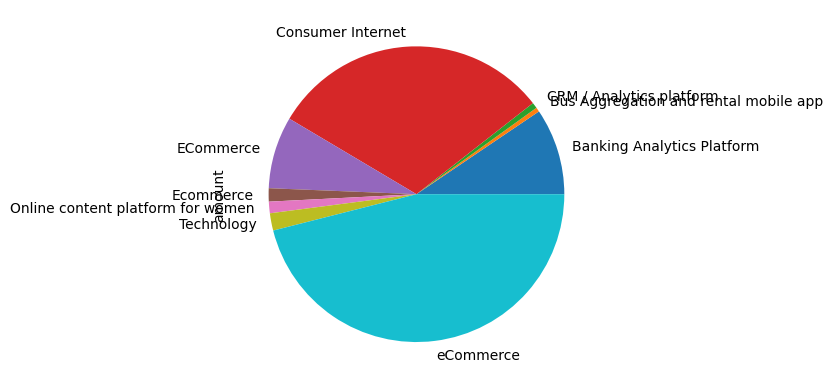

In [29]:
# grouping investors by vertical
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

In [30]:
# grouping investors by round
df[df['investors'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().sort_values(ascending=False)

round
Private Equity    1370.26050
Debt Funding        20.39870
Seed Funding        15.52075
Name: amount, dtype: float64

In [31]:
# gruping investors by city
df[df['investors'].str.contains('IDG Ventures')].groupby('city')['amount'].sum().sort_values(ascending=False)

city
New Delhi    558.74700
Bangalore    372.49800
Mumbai       228.37675
Pune         199.55250
Chennai       47.00570
Name: amount, dtype: float64

### YbY Line Graph Generation
Code for generation of **Year By Year Line Graph**.

In [32]:
df['year'] = df['date'].dt.year

In [33]:
df.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1773.800000,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.824729,2020


<Axes: xlabel='year'>

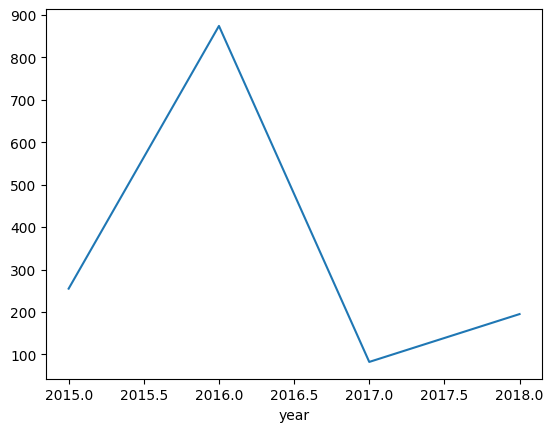

In [34]:
df[df['investors'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot()

In [35]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1773.800000,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.824729,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.607000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.964200,2020
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1330.350000,2020


In [36]:
df[df['investors'].str.contains('IDG Ventures')].groupby('year')

> One remaining functionality: Similar Investors at elapsed time 1:36:00, DIY

In [37]:
round(df['amount'].sum())

132161

In [45]:
df.groupby('startup')['amount'].sum().sort_values(ascending=False).max()

np.float64(22615.95)

In [39]:
df.groupby('startup')['amount'].max().sort_values(ascending=False)

startup
Flipkart         22172.500
Udaan             5188.365
Snapdeal          4434.500
GOQii             3991.050
Olacabs           3547.600
                   ...    
Curatio              0.000
Cult Fitness         0.000
Cuelearn             0.000
Crowdera             0.000
JoulestoWatts        0.000
Name: amount, Length: 1094, dtype: float64

In [46]:
df.groupby('startup')['amount'].sum().mean()

np.float64(120.80565076733183)

In [48]:
df.groupby('startup')['amount'].count().sum()

np.int64(1216)

In [49]:
df['startup'].nunique()

1094

In [52]:
df['month'] = df['date'].dt.month

Startups funded each month.

In [54]:
df.groupby(['year', 'month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,36
1,2015,2,14
2,2015,3,37
3,2015,4,22
4,2015,5,23
...,...,...,...
57,2019,11,5
58,2019,12,5
59,2020,2,2
60,2020,9,2


Amount funded each month.

In [58]:
temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()

In [59]:
temp_df

,year,month,amount
0,2015,1,5670.395150
1,2015,2,1684.764109
2,2015,3,2056.854135
3,2015,4,2090.822405
4,2015,5,883.662815
...,...,...,...
57,2019,11,1239.886200
58,2019,12,1325.915500
59,2020,2,42.571200
60,2020,9,1936.624729


In [60]:
temp_df['x_axis'] = temp_df['month'].astype(str) + '-' + temp_df['year'].astype(str)

In [61]:
temp_df[['amount', 'x_axis']]

,amount,x_axis
0,5670.395150,1-2015
1,1684.764109,2-2015
2,2056.854135,3-2015
3,2090.822405,4-2015
4,883.662815,5-2015
...,...,...
57,1239.886200,11-2019
58,1325.915500,12-2019
59,42.571200,2-2020
60,1936.624729,9-2020
